In [1]:
# Import libraries and modules
import numpy as np
import Synthesis as synt
import Utils as ut
import TestCase as tc
from copy import deepcopy
from qiskit_textbook.tools import array_to_latex

In [2]:
# Testcase preparation
U = ut.generateRandomU(nq=2, nc=10) # Generate random matrix
#U = tc.u # or Use already manually generated matrises in TestCase.py

In [3]:
# Show input matrix
ut.matrix_to_latex(U) 

Matrix([
[         0, 0,         0, -\omega],
[-sqrt(2)/2, 0, sqrt(2)/2,       0],
[         0, 1,         0,       0],
[ sqrt(2)/2, 0, sqrt(2)/2,       0]])

In [4]:
# Check if the matrix is unitary (if so return True)
ut.checkUnitarity(U)

True

In [5]:
# Pass the matrix to synthesis function and call it, then save the return values
# The main return value is Clifford+T Circuit saved in cliffordTCirc variable
# The sceond return value is a higher level circuit made up of only controlled gates, saved in mcgCirc variable
# The third return value is high level components including only 2 level matrises only, saved in HLCs2 variable
# The last return value is high level components including both 2 and 1 level matrises, saved in HLCs12 variable
cliffordTCirc, mcgCirc, HLCs2, HLCs12 = synt.syntCliffordTCircuit(deepcopy(U))

In [6]:
# Show high level componets, 1 and 2 level matrises
HLCs12

H_[2,4]*X_[1,4]*\omega_{[1]}**4*X_[2,3]*\omega_{[4]}**5

In [7]:
# Show high level matrises, only 2 level matrises(1 levels converted into 2 levels)
HLCs2

H_[2,4]*X_[1,4]*(X_[1,2]*T_[1,2]**4*X_[1,2])*X_[2,3]*T_[1,4]**5

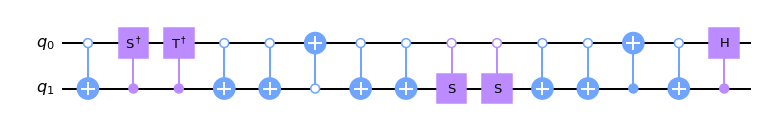

In [8]:
# Show the circuit(made of only controlled gates)
mcgCirc.draw()

In [9]:
# Evaluate mcg circuit
result = ut.assess(U, mcgCirc)[0]

# Show the result (True if the circuit is correct)
result

True

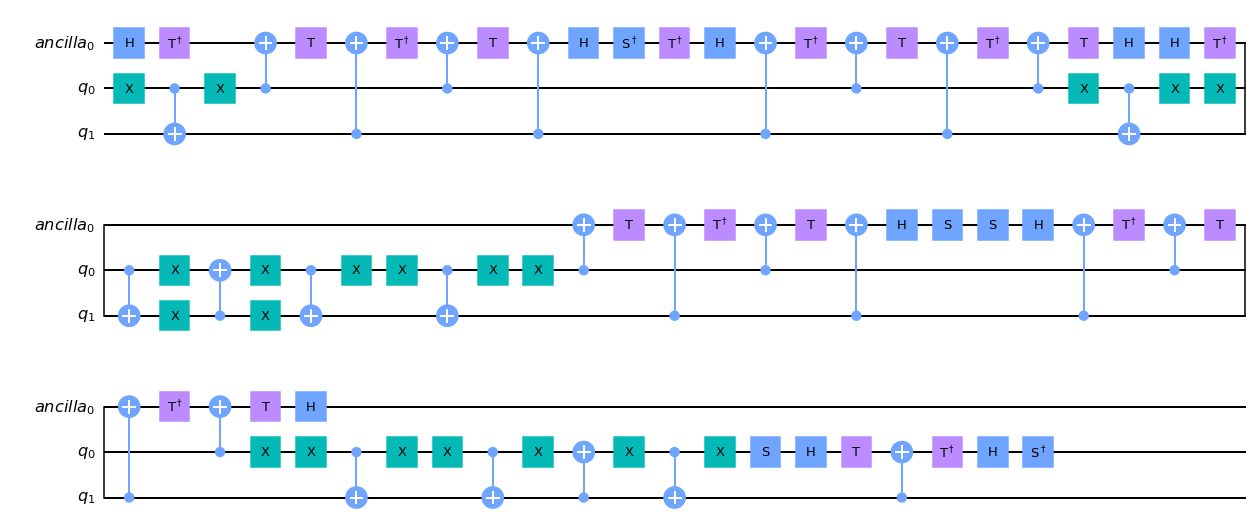

In [10]:
# show the circuit(made of only Clifford+T gates)
cliffordTCirc.draw()

In [11]:
# Evaluate Clifford+T circuit
# Uin is the input matrix (in numerical form)
# Uout is the actuall matrix of generated circuit (in numerical form)
result1,Uin,Uout = ut.assess(U, mcgCirc)

# Show the result (True if the circuit is correct)
result1

True

In [12]:
# Show input matrix
array_to_latex(Uin)

<IPython.core.display.Math object>

In [13]:
# Show the actuall matrix of generated circuit 
# Now compare Uin and Uout visually
array_to_latex(Uout)

<IPython.core.display.Math object>

In [14]:
# Compare 
Uin == Uout

matrix([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])